In [43]:
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [44]:
df_train = pd.read_csv('D:\ĐATN\Data\File_da_xu_ly\chia_data_theo_nam\Data_train_2013_to_2021.csv',header=0)
df_test = pd.read_csv('D:\ĐATN\Data\File_da_xu_ly\chia_data_theo_nam\Data_test_2023.csv',header = 0)
df_valid = pd.read_csv('D:\ĐATN\Data\File_da_xu_ly\chia_data_theo_nam\Data_valid_2022.csv',header = 0)

In [45]:
df_train

,DATE (MM/DD/YYYY),Zenith Angle [degrees],Azimuth Angle [degrees],Airmass,Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower Wind Chill Temp [deg C],Tower RH [%],Total Cloud Cover [%],...,Global CM6b (cor) [W/m^2],Global CM3 (cor) [W/m^2],Global PSP (vent/cor) [W/m^2],Global TSP-700 Vent [W/m^2],Global SP Lite2 [W/m^2],Global LI-200 [W/m^2],Global SP-110 [W/m^2],Global Extraterrestrial (calc) [W/m^2],Direct Extraterrestrial (calc) [W/m^2],GHI Mean
0,2013-01-01 00:00:00,163.21145,356.58560,0.0,-10.38,-10.857,-11.957,-10.380,86.8,0,...,0.0,0.0,1.2805,0.960290,0.001981,0.000000,0.000000,0.0,0.0,0.0
1,2013-01-01 00:01:00,163.22151,357.38163,0.0,-10.33,-10.795,-11.895,-10.330,86.9,0,...,0.0,0.0,1.3352,1.105190,0.007925,0.000000,0.000000,0.0,0.0,0.0
2,2013-01-01 00:02:00,163.22889,358.17842,0.0,-10.31,-10.788,-11.888,-10.310,86.8,0,...,0.0,0.0,1.3458,0.751476,0.001981,0.000000,0.000000,0.0,0.0,0.0
3,2013-01-01 00:03:00,163.23360,358.97573,0.0,-10.19,-10.631,-11.731,-10.190,87.1,0,...,0.0,0.0,1.3239,0.649195,0.000000,0.016435,0.000000,0.0,0.0,0.0
4,2013-01-01 00:04:00,163.23564,359.77334,0.0,-10.23,-10.685,-11.885,-10.230,86.2,0,...,0.0,0.0,1.3559,0.623622,0.005944,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733275,2021-12-31 23:55:00,163.14267,352.72537,0.0,-10.49,-10.766,-11.566,-15.061,90.8,0,...,0.0,0.0,0.0000,1.453560,0.004778,0.000000,0.022651,0.0,0.0,0.0
4733276,2021-12-31 23:56:00,163.16563,353.51524,0.0,-10.50,-10.788,-11.588,-15.764,90.7,0,...,0.0,0.0,0.0000,1.726190,0.000000,0.000000,0.000000,0.0,0.0,0.0
4733277,2021-12-31 23:57:00,163.18596,354.30694,0.0,-10.52,-10.808,-11.608,-15.671,90.7,0,...,0.0,0.0,0.0000,1.564840,0.000000,0.000000,0.000000,0.0,0.0,0.0
4733278,2021-12-31 23:58:00,163.20364,355.10028,0.0,-10.54,-10.828,-11.628,-15.400,90.7,0,...,0.0,0.0,0.0000,1.541190,0.000000,0.000000,0.018121,0.0,0.0,0.0


In [46]:
df_train['DATE (MM/DD/YYYY)'] = pd.to_datetime(df_train['DATE (MM/DD/YYYY)'], format='%Y-%m-%d %H:%M:%S')
df_train.set_index('DATE (MM/DD/YYYY)', inplace=True)

df_valid['DATE (MM/DD/YYYY)'] = pd.to_datetime(df_valid['DATE (MM/DD/YYYY)'], format='%Y-%m-%d %H:%M:%S')
df_valid.set_index('DATE (MM/DD/YYYY)', inplace=True)

df_test['DATE (MM/DD/YYYY)'] = pd.to_datetime(df_test['DATE (MM/DD/YYYY)'], format='%Y-%m-%d %H:%M:%S')
df_test.set_index('DATE (MM/DD/YYYY)', inplace=True)


In [47]:
df_train.drop(columns=['Global CMP22 (vent/cor) [W/m^2]','Global CM6b (cor) [W/m^2]','Global CM3 (cor) [W/m^2]','Global PSP (vent/cor) [W/m^2]','Global LI-200 [W/m^2]','Global TSP-700 Vent [W/m^2]','Global SP Lite2 [W/m^2]','Global SP-110 [W/m^2]'], inplace=True)
df_train

,Zenith Angle [degrees],Azimuth Angle [degrees],Airmass,Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower Wind Chill Temp [deg C],Tower RH [%],Total Cloud Cover [%],Opaque Cloud Cover [%],Avg Wind Speed @ 19ft [m/s],Peak Wind Speed @ 19ft [m/s],Avg Wind Direction @ 19ft [deg from N],Vertical Wind Shear [1/s],Station Pressure [mBar],Global Extraterrestrial (calc) [W/m^2],Direct Extraterrestrial (calc) [W/m^2],GHI Mean
DATE (MM/DD/YYYY),,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,163.21145,356.58560,0.0,-10.38,-10.857,-11.957,-10.380,86.8,0,0,0.000,0.00,0.000,0.000,814.112,0.0,0.0,0.0
2013-01-01 00:01:00,163.22151,357.38163,0.0,-10.33,-10.795,-11.895,-10.330,86.9,0,0,0.000,0.00,0.000,0.000,814.112,0.0,0.0,0.0
2013-01-01 00:02:00,163.22889,358.17842,0.0,-10.31,-10.788,-11.888,-10.310,86.8,0,0,0.000,0.00,0.000,0.000,814.112,0.0,0.0,0.0
2013-01-01 00:03:00,163.23360,358.97573,0.0,-10.19,-10.631,-11.731,-10.190,87.1,0,0,0.512,0.95,351.900,0.000,814.112,0.0,0.0,0.0
2013-01-01 00:04:00,163.23564,359.77334,0.0,-10.23,-10.685,-11.885,-10.230,86.2,0,0,1.000,1.20,343.700,0.000,814.112,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:55:00,163.14267,352.72537,0.0,-10.49,-10.766,-11.566,-15.061,90.8,0,0,3.400,3.95,11.070,0.127,804.574,0.0,0.0,0.0
2021-12-31 23:56:00,163.16563,353.51524,0.0,-10.50,-10.788,-11.588,-15.764,90.7,0,0,3.813,4.45,7.687,0.150,804.592,0.0,0.0,0.0
2021-12-31 23:57:00,163.18596,354.30694,0.0,-10.52,-10.808,-11.608,-15.671,90.7,0,0,3.538,4.45,12.140,0.080,804.606,0.0,0.0,0.0


In [48]:
print(df_train.isna().sum())
print(df_valid.isna().sum())
print(df_test.isna().sum())


Zenith Angle [degrees]                    0
Azimuth Angle [degrees]                   0
Airmass                                   0
Tower Dry Bulb Temp [deg C]               0
Tower Wet Bulb Temp [deg C]               0
Tower Dew Point Temp [deg C]              0
Tower Wind Chill Temp [deg C]             0
Tower RH [%]                              0
Total Cloud Cover [%]                     0
Opaque Cloud Cover [%]                    0
Avg Wind Speed @ 19ft [m/s]               0
Peak Wind Speed @ 19ft [m/s]              0
Avg Wind Direction @ 19ft [deg from N]    0
Vertical Wind Shear [1/s]                 0
Station Pressure [mBar]                   0
Global Extraterrestrial (calc) [W/m^2]    0
Direct Extraterrestrial (calc) [W/m^2]    0
GHI Mean                                  0
dtype: int64
Zenith Angle [degrees]                    0
Azimuth Angle [degrees]                   0
Airmass                                   0
Tower Dry Bulb Temp [deg C]               0
Tower Wet Bulb Temp

In [49]:
# Resample to 5 min
df_train = df_train.resample('5T').mean()
df_valid = df_valid.resample('5T').mean()
df_test = df_test.resample('5T').mean()


C:\Users\nvthi\AppData\Local\Temp\ipykernel_2188\3778847693.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_train = df_train.resample('5T').mean()
C:\Users\nvthi\AppData\Local\Temp\ipykernel_2188\3778847693.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_valid = df_valid.resample('5T').mean()
C:\Users\nvthi\AppData\Local\Temp\ipykernel_2188\3778847693.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_test = df_test.resample('5T').mean()


# Feature Selection


In [50]:
#importing libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

In [51]:
def bad_correlation_with_output(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman')  # Calculate Spearman correlation
    num_columns = len(corr_matrix.columns) 
    for i in range(num_columns):
        if i != 0:
            if abs(corr_matrix.iloc[i,17 ]) < threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [52]:
Spearman = df_train.corr(method='spearman')

Text(0.5, 1.0, 'Spearman Correlation')

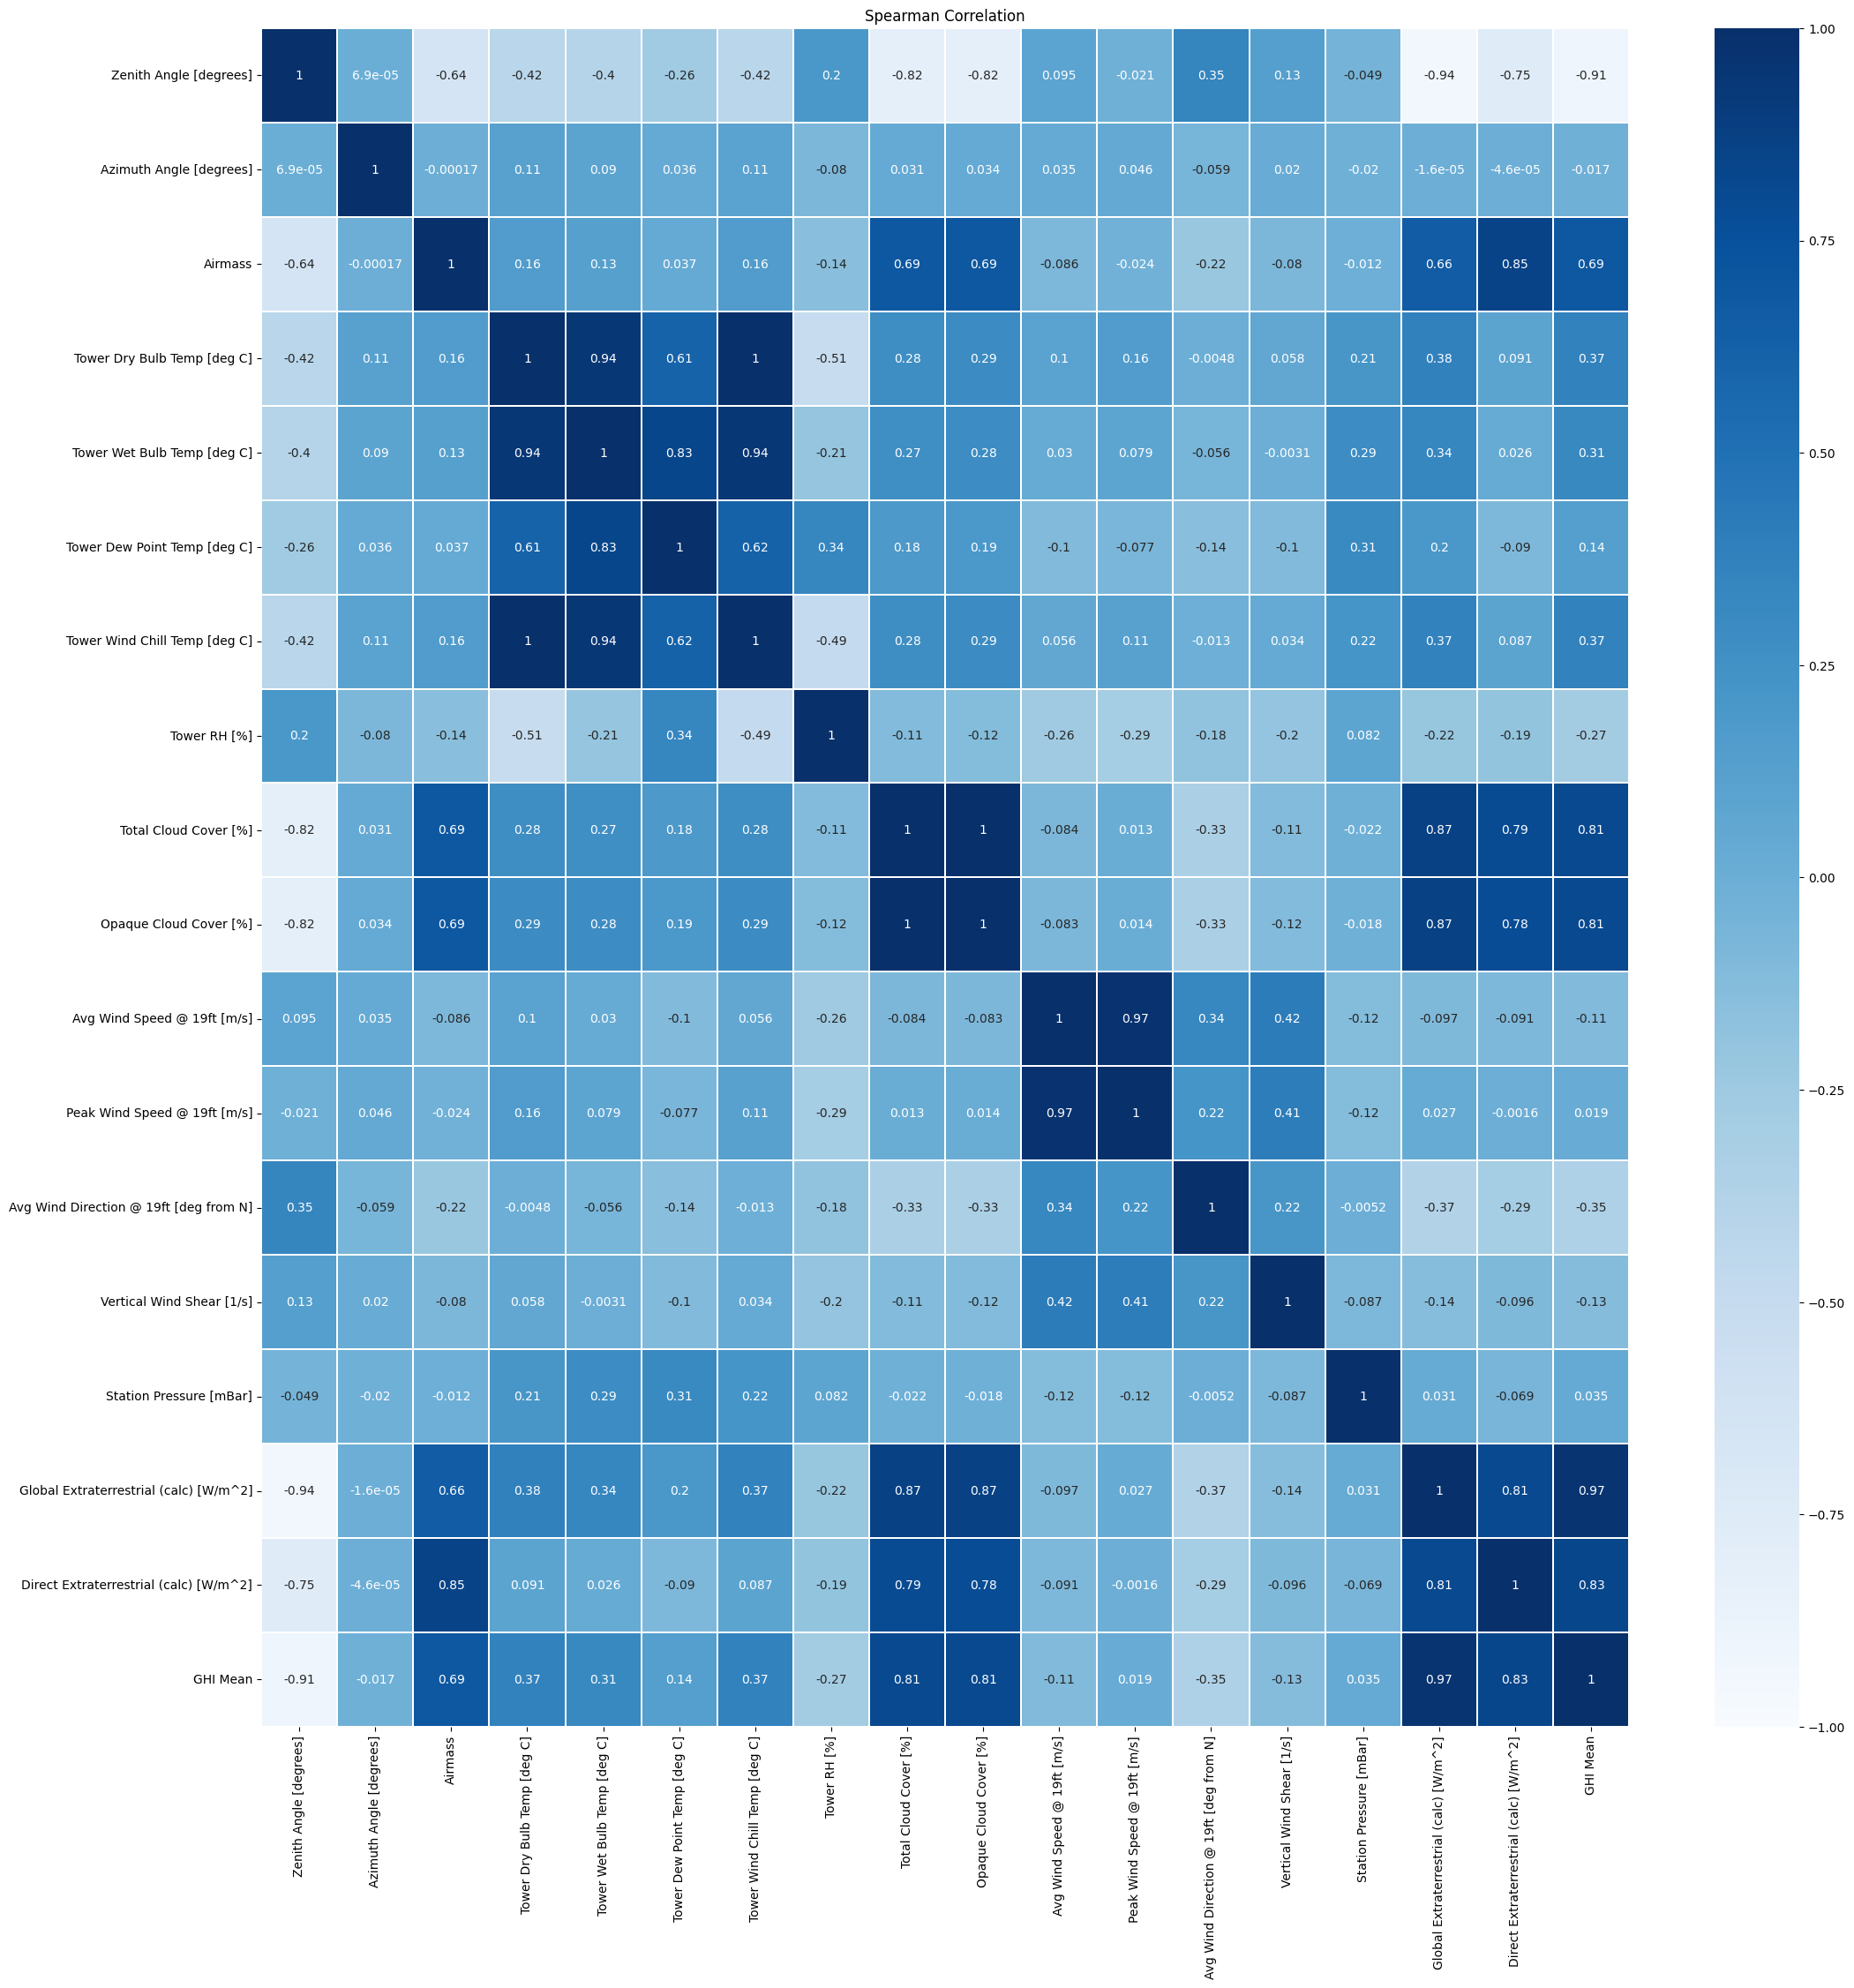

In [53]:
fig = plt.subplots(figsize=(25,25))
sns.heatmap(Spearman, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

In [54]:
bad_features = bad_correlation_with_output(df_train, 0.2)
print(len(set(bad_features)))
bad_features

6


{'Avg Wind Speed @ 19ft [m/s]',
 'Azimuth Angle [degrees]',
 'Peak Wind Speed @ 19ft [m/s]',
 'Station Pressure [mBar]',
 'Tower Dew Point Temp [deg C]',
 'Vertical Wind Shear [1/s]'}

In [55]:
df_train= df_train.drop(bad_features,axis=1)
df_test= df_test.drop(bad_features,axis=1)
df_valid= df_valid.drop(bad_features,axis=1)

In [56]:
print(df_train.isna().sum())
print(df_test.isna().sum())
print(df_valid.isna().sum())

Zenith Angle [degrees]                    0
Airmass                                   0
Tower Dry Bulb Temp [deg C]               0
Tower Wet Bulb Temp [deg C]               0
Tower Wind Chill Temp [deg C]             0
Tower RH [%]                              0
Total Cloud Cover [%]                     0
Opaque Cloud Cover [%]                    0
Avg Wind Direction @ 19ft [deg from N]    0
Global Extraterrestrial (calc) [W/m^2]    0
Direct Extraterrestrial (calc) [W/m^2]    0
GHI Mean                                  0
dtype: int64
Zenith Angle [degrees]                    0
Airmass                                   0
Tower Dry Bulb Temp [deg C]               0
Tower Wet Bulb Temp [deg C]               0
Tower Wind Chill Temp [deg C]             0
Tower RH [%]                              0
Total Cloud Cover [%]                     0
Opaque Cloud Cover [%]                    0
Avg Wind Direction @ 19ft [deg from N]    0
Global Extraterrestrial (calc) [W/m^2]    0
Direct Extraterrest

In [57]:
df_train.drop(columns=['Tower Wet Bulb Temp [deg C]','Total Cloud Cover [%]','Direct Extraterrestrial (calc) [W/m^2]','Tower Wind Chill Temp [deg C]'], inplace=True)
df_valid.drop(columns=['Tower Wet Bulb Temp [deg C]','Total Cloud Cover [%]','Direct Extraterrestrial (calc) [W/m^2]','Tower Wind Chill Temp [deg C]'], inplace=True)
df_test.drop(columns=['Tower Wet Bulb Temp [deg C]','Total Cloud Cover [%]','Direct Extraterrestrial (calc) [W/m^2]','Tower Wind Chill Temp [deg C]'], inplace=True)

Text(0.5, 1.0, 'Spearman Correlation')

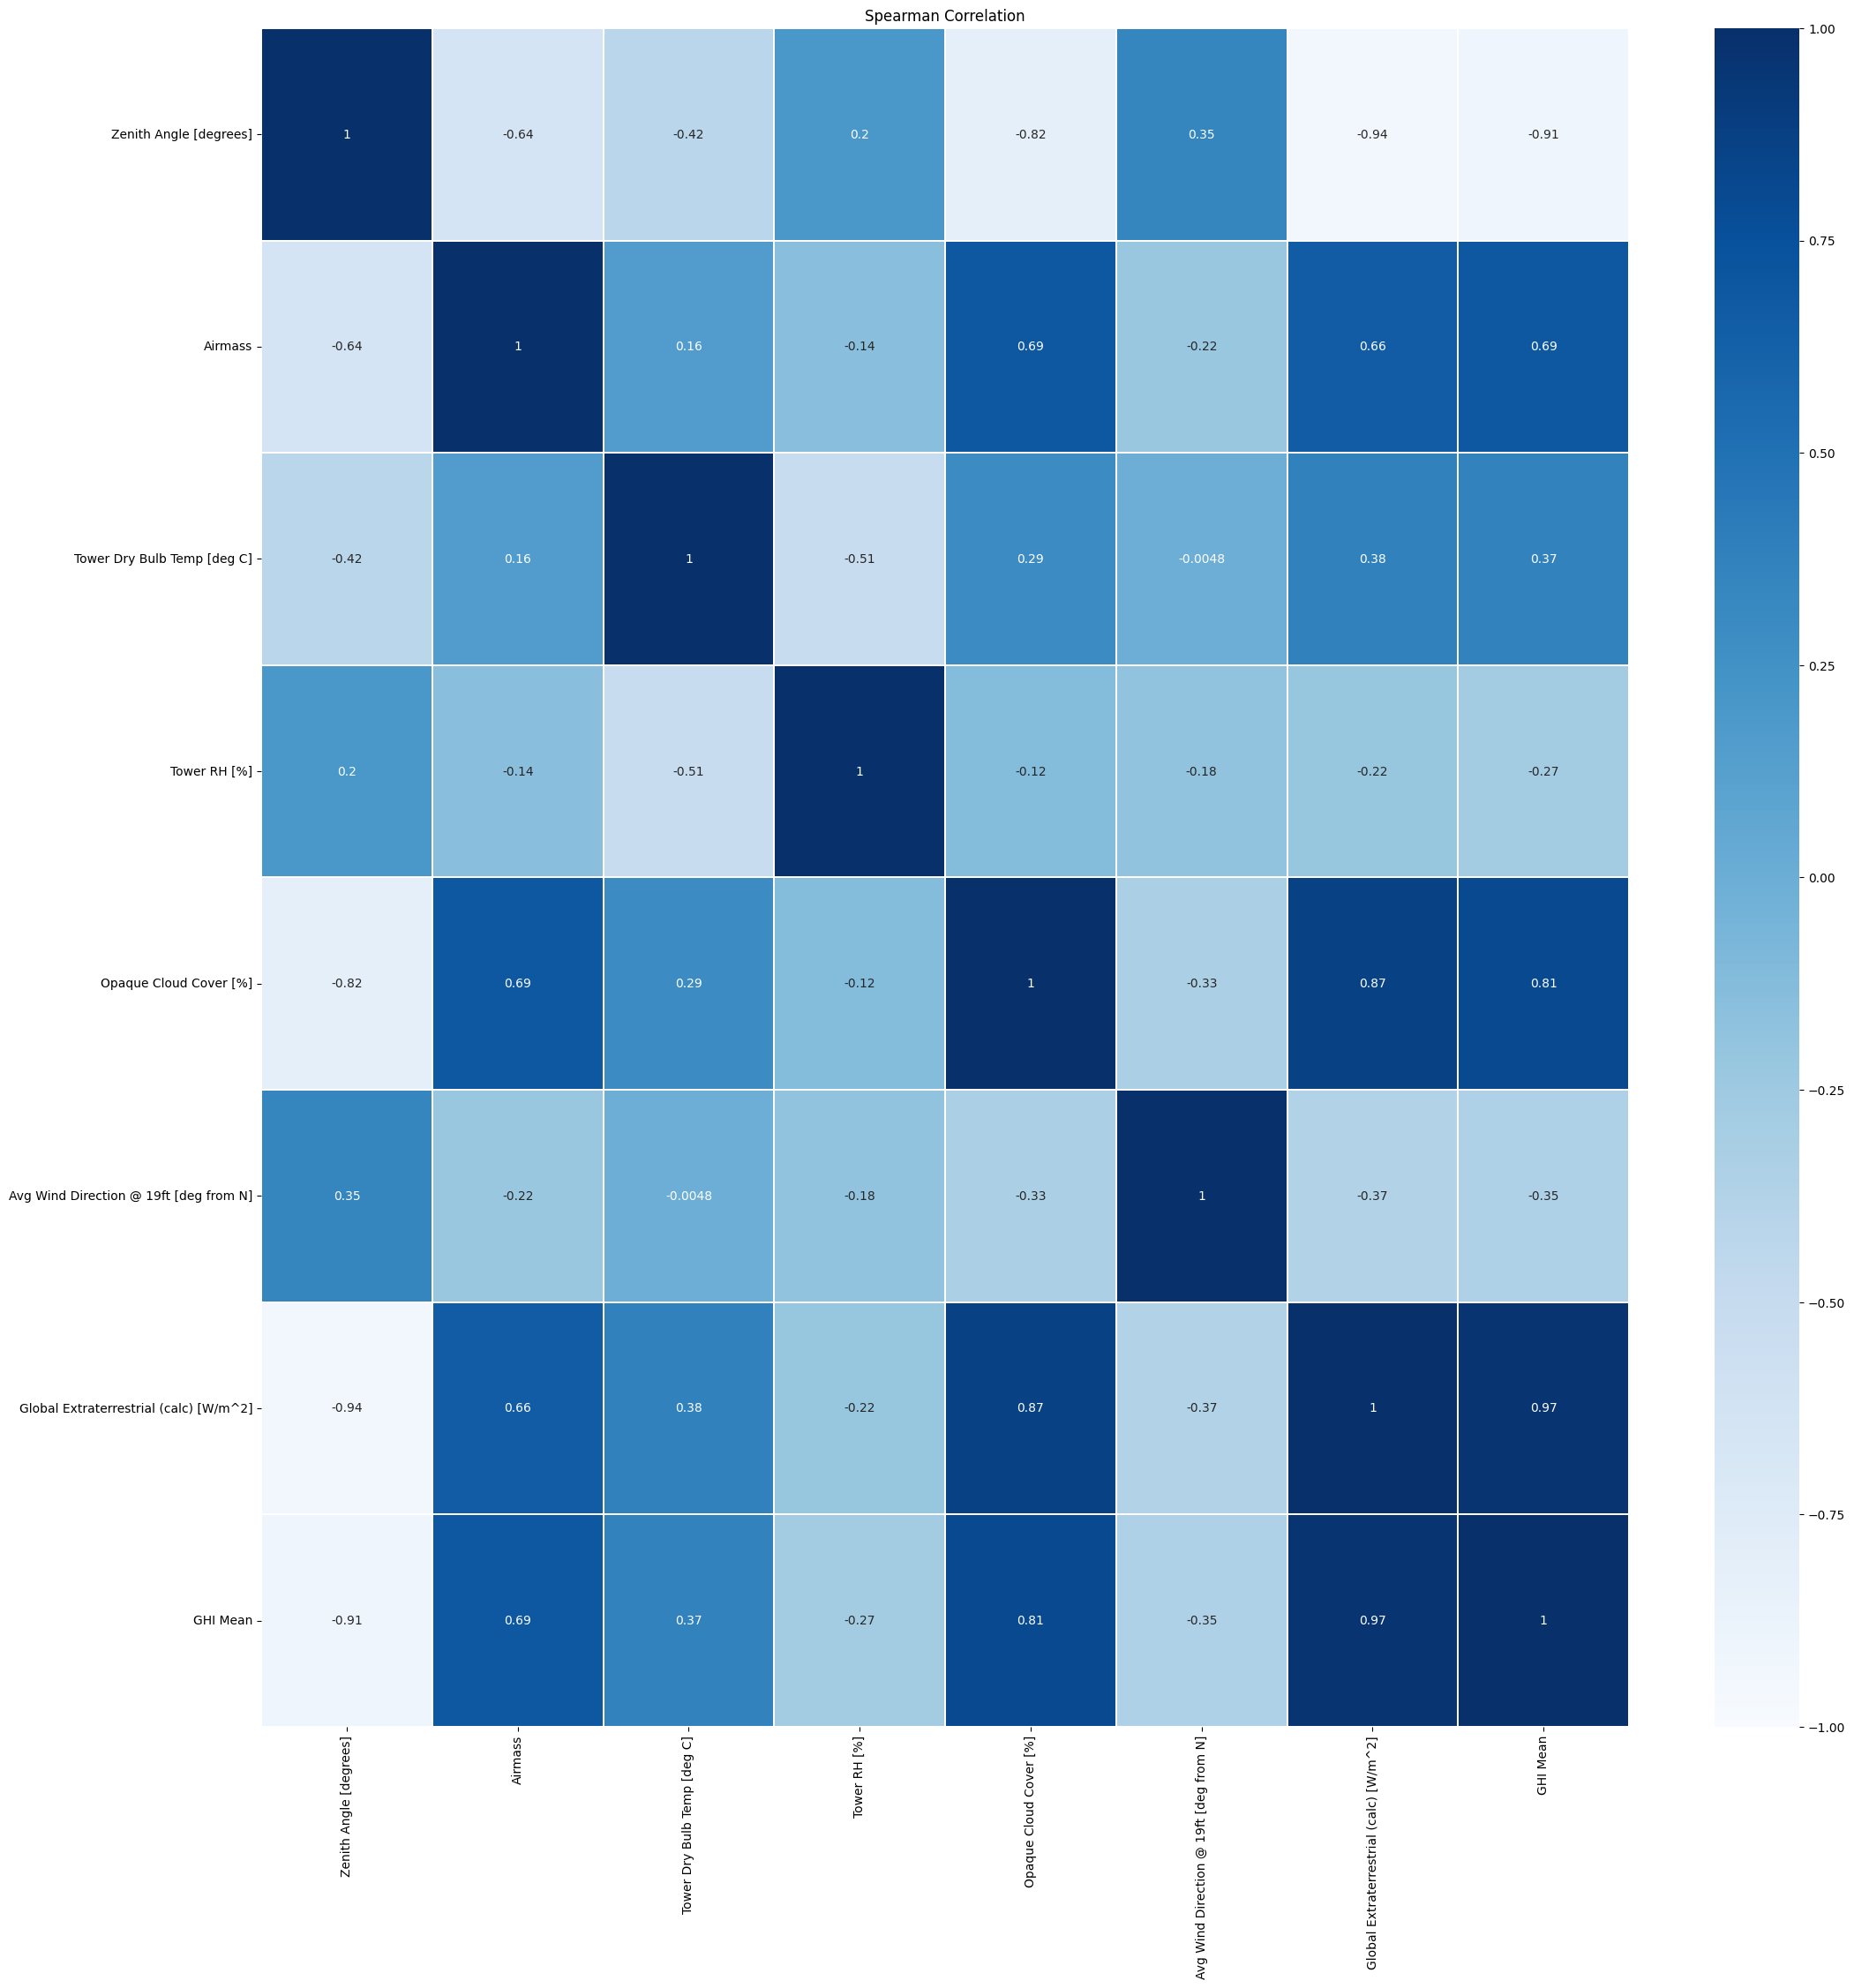

In [58]:
Spearman = df_train.corr(method='spearman')
fig = plt.subplots(figsize=(25,25))
sns.heatmap(Spearman, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

# Split data

In [101]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [103]:
### create mutlivariate data
def mutlivariate_data(dataset , target , start_idx , end_idx , history_size , target_size,
                      step ,  single_step = False):
  data = []
  labels = []
  start_idx = start_idx + history_size
  if end_idx is None:
    end_idx = len(dataset)- target_size
  for i in range(start_idx , end_idx ):
    idxs = range(i-history_size, i, step) ### using step
    data.append(dataset[idxs])
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data) , np.array(labels)

In [104]:
def multivariate_test_data(dataset, target, start_idx, end_idx, history_size, target_size,
                      step, single_step=False):
    data = []
    labels = []
    if end_idx is None:
        end_idx = len(dataset) - history_size - target_size + 1
    for i in range(start_idx, end_idx, step):
        data.append(dataset[i : i + history_size])
        if single_step:
            labels.append(target[i + history_size])
        else:
            labels.append(target[i + history_size : i + history_size + target_size])

    return np.array(data), np.array(labels)

In [105]:
features = df_train.columns
features

Index(['Zenith Angle [degrees]', 'Airmass', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Wind Chill Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Opaque Cloud Cover [%]',
       'Avg Wind Direction @ 19ft [deg from N]',
       'Global Extraterrestrial (calc) [W/m^2]',
       'Direct Extraterrestrial (calc) [W/m^2]', 'GHI Mean'],
      dtype='object')

In [106]:
train_scaler = StandardScaler()
df_train_scaled =  train_scaler.fit_transform(df_train)
df_val_scaled =  train_scaler.fit_transform(df_valid)
df_test_scaled =  train_scaler.fit_transform(df_test)

In [107]:
history = 12
STEP = 1
future_target = 12 # 12 future values 1h x 24

data_train = df_train_scaled
data_val = df_val_scaled
data_test = df_test_scaled

# Tạo dữ liệu cho tập train
x_train_multi, y_train_multi = mutlivariate_data(data_train, data_train[:, 10],
                                                  0,None, 
                                                  history, future_target, STEP)

# Tạo dữ liệu cho tập validation
x_val_multi, y_val_multi = mutlivariate_data(data_val, data_val[:, 10],
                                             0, None, 
                                             history, future_target, STEP)

# Tạo dữ liệu cho tập test
x_test_multi, y_test_multi = multivariate_test_data(data_test, data_test[:,10],
                                               0, None, 
                                               history, future_target, 1)

print(x_train_multi.shape)
print(y_train_multi.shape)
print(x_val_multi.shape)
print(y_val_multi.shape)
print(x_test_multi.shape)
print(y_test_multi.shape)

(946632, 12, 12)
(946632, 12)
(105096, 12, 12)
(105096, 12)
(105097, 12, 12)
(105097, 12)


In [112]:
df_train.shape

(946656, 12)

In [113]:
# TF DATASET
buffer_size = 10000
batch_size = 16
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(batch_size).repeat()

test_data_multi = tf.data.Dataset.from_tensor_slices((x_test_multi, y_test_multi))
test_data_multi = test_data_multi.batch(batch_size).repeat()
print(x_train_multi.shape)
print(y_train_multi.shape)
print(x_val_multi.shape)
print(y_val_multi.shape)
print(x_test_multi.shape)
print(y_test_multi.shape)

(946632, 12, 12)
(946632, 12)
(105096, 12, 12)
(105096, 12)
(105097, 12, 12)
(105097, 12)


# Test_train

In [130]:
num_epochs = 10
step_per_epochs = 100

In [131]:
initial_lr = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=10000, decay_rate=0.96,staircase=True)

In [132]:
# Define callbacks
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
lstm_early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lstm_model_checkpoint = ModelCheckpoint("D:\\ĐATN\Data\\lstm_model.h5", monitor='val_loss', save_best_only=True)


lstm_multi_step_model = tf.keras.models.Sequential()

lstm_multi_step_model.add(tf.keras.layers.LSTM(64, return_sequences=True,input_shape=(12,12)))
lstm_multi_step_model.add(tf.keras.layers.Dropout(0.2))

lstm_multi_step_model.add(tf.keras.layers.LSTM(32, activation='relu'))
lstm_multi_step_model.add(tf.keras.layers.Dropout(0.2))


lstm_multi_step_model.add(tf.keras.layers.Dense(future_target)) # for 12 outputs

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
lstm_multi_step_model.compile(optimizer=optimizer, loss='mae')

lstm_multi_step_model.summary()
# Save the model
lstm_model_path = "D:\\ĐATN\Data\\lstm_model.h5"
lstm_multi_step_model.save(lstm_model_path)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 12, 64)            19712     
                                                                 
 dropout_20 (Dropout)        (None, 12, 64)            0         
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 12)                396       
                                                                 
Total params: 32524 (127.05 KB)
Trainable params: 32524 (127.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
lstm_multi_step_history =lstm_multi_step_model.fit(train_data_multi, epochs= num_epochs,
                                          steps_per_epoch=step_per_epochs,
                                          validation_data=val_data_multi,
                                          validation_steps=50,
                                          callbacks=[lstm_early_stopping, lstm_model_checkpoint])

Epoch 1/10


100/100 [==============================] - 6s 19ms/step - loss: 38.9662 - val_loss: 0.8749
Epoch 2/10
100/100 [==============================] - 1s 12ms/step - loss: 0.7601 - val_loss: 0.4293
Epoch 3/10
100/100 [==============================] - 1s 12ms/step - loss: 0.5781 - val_loss: 0.3969
Epoch 4/10
100/100 [==============================] - 1s 12ms/step - loss: 0.5125 - val_loss: 0.4570
Epoch 5/10
100/100 [==============================] - 1s 12ms/step - loss: 0.4995 - val_loss: 0.5612
Epoch 6/10
100/100 [==============================] - 1s 12ms/step - loss: 0.4894 - val_loss: 0.5728
Epoch 7/10
100/100 [==============================] - 1s 12ms/step - loss: 0.6604 - val_loss: 0.6244
Epoch 8/10
100/100 [==============================] - 1s 10ms/step - loss: 0.5118 - val_loss: 0.5597
Epoch 9/10
100/100 [==============================] - 1s 11ms/step - loss: 0.4757 - val_loss: 0.5930
Epoch 10/10
100/100 [==============================] - 1s 10ms/step - loss: 0.4972 - val_loss: 0.5834